In [1]:
import tensorflow.compat.v1 as tf
#Lets see if tensorflow finds the GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
#import tensorflow as tf

2023-04-06 15:09:07.647220: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-06 15:09:09.131430: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Num GPUs Available:  1


2023-04-06 15:09:23.077760: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-06 15:09:23.312237: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-06 15:09:23.312770: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [2]:
#Lets see if it works
tf.ones(1) + tf.ones(1)

2023-04-06 15:09:23.327509: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-06 15:09:23.328298: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-06 15:09:23.328418: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-06 15:09:23.328490: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative val

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.], dtype=float32)>

In [3]:
import numpy as np # for working with arrays and matrices
import pandas as pd # for data manipulation and analysis
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization

import os # OS module provides various operating system-related functions to the code
import csv # CSV module is used for working with CSV (Comma Separated Values) files in Python.
import pickle



# used for splitting data into training and testing sets in Python.
from sklearn.model_selection import train_test_split 

# for generating a confusion matrix
from sklearn.metrics import confusion_matrix
from keras.models import load_model


# Classes and functions from the Keras library which is used for building and training deep learning models in Python.
from keras.models import model_from_json
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# These import the Adam optimizer class and various other classes from the TensorFlow Keras library 
# which is a high-level neural networks API used for building and training deep learning models in Python.
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
# Load the history object from the pickle file
with open('history.pkl', 'rb') as f:
    history = pickle.load(f)
    
with open('train_images.pkl', 'rb') as f:
    train_images = pickle.load(f)
    
with open('train_labels.pkl', 'rb') as f:
    train_labels = pickle.load(f)
    
with open('val_images.pkl', 'rb') as f:
    val_images = pickle.load(f)
    
with open('val_labels.pkl', 'rb') as f:
    val_labels = pickle.load(f)

In [5]:
# Inspect the contents of the pickle file
#print(history)

In [58]:
dir_path = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/V2"
x = 0

In [63]:
# plot the accuracy and loss of the model during training. (validation later)
def plot_accuracy(x):
    dir_path = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/V2/accuracy"

    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.savefig('model_accuracy.png')
    plt.savefig(dir_path+"/"+'model_accuracy_'+str(x)+'.png', bbox_inches='tight', dpi=300)
    return plt.show()


In [64]:
def plot_loss(x):
    dir_path = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/V2/loss"

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.savefig(dir_path+"/"+'loss_'+str(x)+'.png', bbox_inches='tight', dpi=300)
    return plt.show()

In [65]:
# def plot_confusion_matrix_train(no_of_behaviors, train_confusion):
    
#     dir_path = "/home/dmc/Desktop/kostas/direct-Behavior-prediction-from-miniscope-calcium-imaging-using-convolutional-neural-networks/src/V2"
    
#     # Plot the confusion matrix
#     fig, ax = plt.subplots(figsize=(8,6))
#     cmap = plt.get_cmap('Blues')

#     tick_marks = np.arange(len(no_of_behaviors))
#     plt.xticks(tick_marks, no_of_behaviors, rotation=45)
#     plt.yticks(tick_marks, no_of_behaviors)
#     plt.tight_layout()

#     ax.imshow(train_confusion, interpolation='nearest', cmap=cmap)
#     ax.set_xticks(np.arange(len(no_of_behaviors)))
#     ax.set_yticks(np.arange(len(no_of_behaviors)))
#     ax.set_xticklabels(no_of_behaviors)
#     ax.set_yticklabels(no_of_behaviors)
#     ax.set_xlabel('Predicted labels')
#     ax.set_ylabel('True labels')

#     # cm = confusion_matrix (train_labels, predicted_labels)
#     # print(cm)
  
#     # Add text annotations to the confusion matrix boxes
#     for i in range(len(no_of_behaviors)):
#         for j in range(len(no_of_behaviors)):
#             #ax.text(j, i, str(f'{(confusion[i, j]/counts[i])*100:.2f}%'), ha='center', va='center', color='black')
#             ax.text(j, i, str((train_confusion[i, j]), ha='center', va='center', color='black'))

            
# # Set the title
#     plt.savefig(dir_path+"/"+'cm_'+str(x)+'.png', bbox_inches='tight', dpi=300)
#     ax.set_title('Confusion Matrix')
#     return plt.show()

In [66]:
main = 11336
left = 9643
right = 3610
total_counts = main + left + right
counts = [main, left, right]

In [12]:
# format the train_labels to be appropriate for the predict method
# Reshape train_labels and val_labels if they have only one dimension
if len(train_labels.shape) == 1:
    train_labels = np.reshape(train_labels, (-1, 1))
if len(val_labels.shape) == 1:
    val_labels = np.reshape(val_labels, (-1, 1))

train_labels = np.argmax(train_labels, axis=1)
val_labels = np.argmax(val_labels, axis=1)

# Predict the class labels of the training images using the trained model
model = load_model('BPNN_V2_model.h5')
train_predicted_labels = np.argmax(model.predict(train_images), axis=1)
val_predicted_labels = np.argmax(model.predict(val_images), axis=1)

2023-04-06 15:11:47.683191: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401


 19/615 [..............................] - ETA: 5s

2023-04-06 15:11:48.666540: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


154/154 [==============================] - 2s 10ms/step


In [21]:
# Compute the confusion matrix using the predicted class labels and the true class labels
train_confusion = confusion_matrix(train_labels, train_predicted_labels)
val_confusion = confusion_matrix(val_labels, val_predicted_labels)

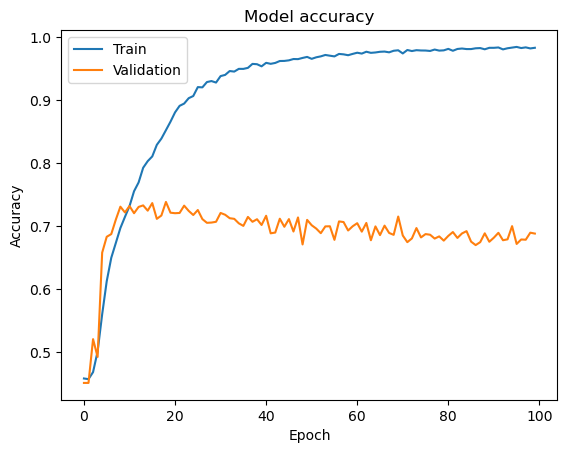

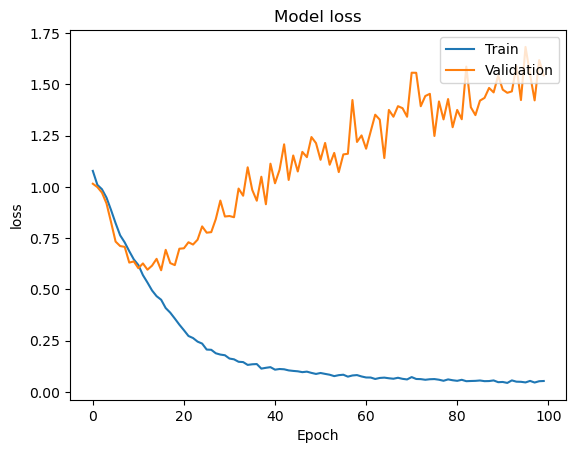

In [67]:
plot_accuracy(x)
plot_loss(x)
x = x+1
no_of_behaviors = ['Main Corr', 'Left Corr', 'Right Corr']
#p lot_confusion_matrix_train(no_of_behaviors, train_confusion)

In [26]:
#plot_confusion_matrix_val(no_of_behaviors, val_confusion)

In [ ]:
# no_of_behaviors = ['Main Corr', 'Left Corr', 'Right Corr']
# plot_confusion_matrix_combined(no_of_behaviors, train_confusion, val_confusion)
